In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
os.getcwd()

'C:\\Users\\Pasindu Siriwardana\\JupyterNoteBookFiles\\Projects\\Page-View-Time-Series-Visualizer'

In [30]:
df = pd.read_csv(
    filepath_or_buffer = 'fcc-forum-pageviews.csv',
    parse_dates = ['date'],
    index_col = 'date'
)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [49]:
df.count()

value    1304
dtype: int64

In [50]:
df.isna().any()

value    False
dtype: bool

<AxesSubplot:xlabel='date'>

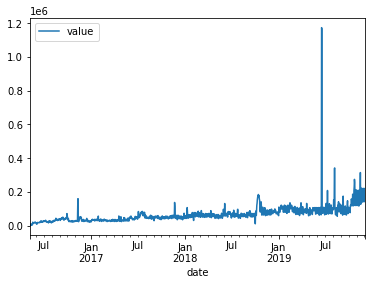

In [51]:
df.plot()

In [4]:
df.loc['2019-06-17':'2019-06-18']

,value
date,
2019-06-17,1173655
2019-06-18,1166225


In [31]:
# df.loc['2019-06-17':'2019-06-18'].value = round(df.value.mean(), 0)
# df.replace(df.loc['2019-06-17':'2019-06-18'], value = round(df.value.mean(), 0))
# df.loc['2019-08-05':'2019-08-12']
# df.head()
df = df.drop(['2019-06-17', '2019-06-18'])
df = df.drop(['2019-08-06', '2019-08-07'])
# df.loc['2019-08-06':'2019-08-07']

In [32]:
def draw_line_plot():
    fig = df.plot(
                color = 'red', 
                title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019', 
                xlabel = 'Date',
                ylabel = 'Page Views'
            )
    print(fig)

AxesSubplot(0.125,0.2;0.775x0.68)


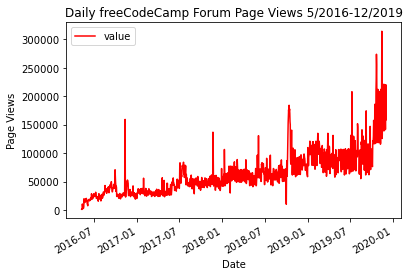

In [33]:
draw_line_plot()

In [74]:
round(df.value.mean(), 0)

65527.0

<AxesSubplot:xlabel='date'>

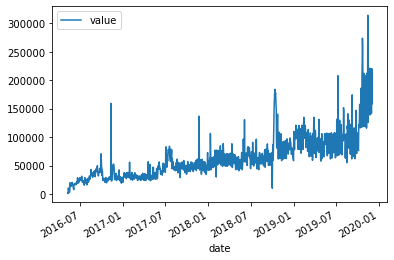

In [93]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

# df[(df.value == round(df.value.quantile(0.975), 0)) | (df.value == round(df.value.quantile(0.025), 0))]
# df.head()

df[(df.value <= round(df.value.quantile(0.975), 0)) | (df.value >= round(df.value.quantile(0.025), 0))].plot()

In [97]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [116]:
df.groupby('date').sum?

Signature: sum(iterable, /, start=0)
Docstring:
Return the sum of a 'start' value (default: 0) plus an iterable of numbers

When the iterable is empty, return the start value.
This function is intended specifically for use with numeric values and may
reject non-numeric types.
Type:      builtin_function_or_method


In [ ]:
df.groupby('date').sum

In [34]:
df_month = df.copy(deep = True)
df_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1300 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1300 non-null   int64
dtypes: int64(1)
memory usage: 20.3 KB


In [35]:
df_month = df_month.reset_index()

In [36]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1300 non-null   datetime64[ns]
 1   value   1300 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.4 KB


In [37]:
df_month.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [38]:
df_month['month'] = pd.DatetimeIndex(df_month['date']).month_name()
df_month['year'] = pd.DatetimeIndex(df_month['date']).year

In [39]:
df_month.head()

,date,value,month,year
0,2016-05-09,1201,May,2016
1,2016-05-10,2329,May,2016
2,2016-05-11,1716,May,2016
3,2016-05-12,10539,May,2016
4,2016-05-13,6933,May,2016


In [40]:
df_year = df_month.groupby(['year','month'])['value'].mean()
#  # year, month
# df_year.plot(
#     kind = 'bar',
#     figsize = (10,10),
#     legend = df_year.month.tolist()
# )
# df_year = df_month.groupby(['month'])['value'].mean()
# df_year = df_year.groupby('year')
df_year.head()

year  month   
2016  August      31049.193548
      December    27832.419355
      July        23314.225806
      June        19124.366667
      May         11242.695652
Name: value, dtype: float64

In [159]:
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]

data

[[30, 25, 50, 20], [40, 23, 51, 17], [35, 22, 45, 19]]

<BarContainer object of 4 artists>

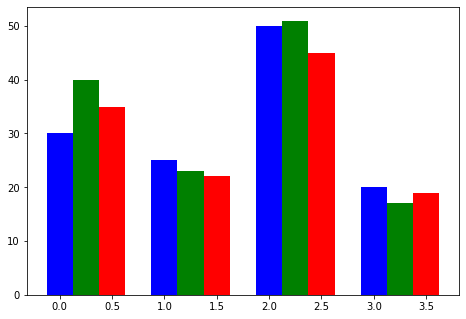

In [162]:
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [41]:
df_year = df_year.reset_index()
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    44 non-null     int64  
 1   month   44 non-null     object 
 2   value   44 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


<AxesSubplot:xlabel='year', ylabel='value'>

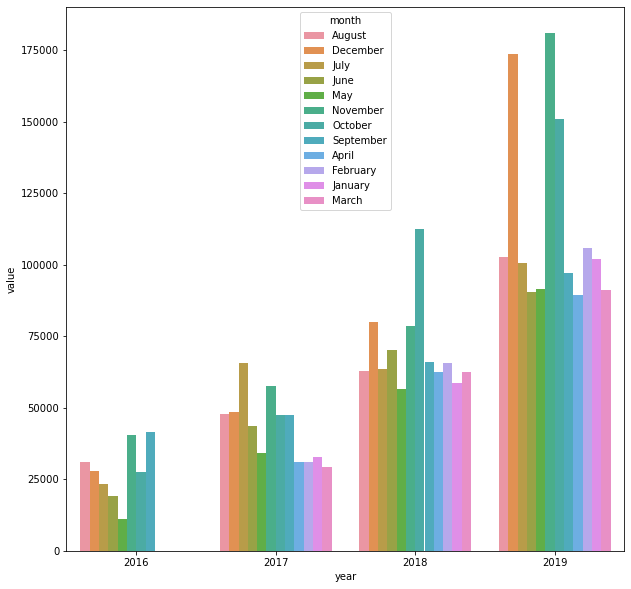

In [42]:
fig, ax = plt.subplots(figsize = (10,10))

sns.barplot(
    data = df_year,
    x = 'year',
    y = 'value',
    hue = 'month'
)

In [43]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. 
# The legend should show month labels and have a title of Months. 
# On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

def draw_bar_plot():
    df_month = df.copy(deep = True)
    df_month = df_month.reset_index()
    df_month['month'] = pd.DatetimeIndex(df_month['date']).month_name()
    df_month['year'] = pd.DatetimeIndex(df_month['date']).year
    df_year = df_month.groupby(['year','month'])['value'].mean() # create multiindex series
    df_year = df_year.reset_index() # converting the mulit indexed series to a dataframe
    
    # Draw the bar plot
    fig, ax = plt.subplots(figsize = (10,10))

    sns.barplot(
        data = df_year,
        x = 'year',
        y = 'value',
        hue = 'month'
    )


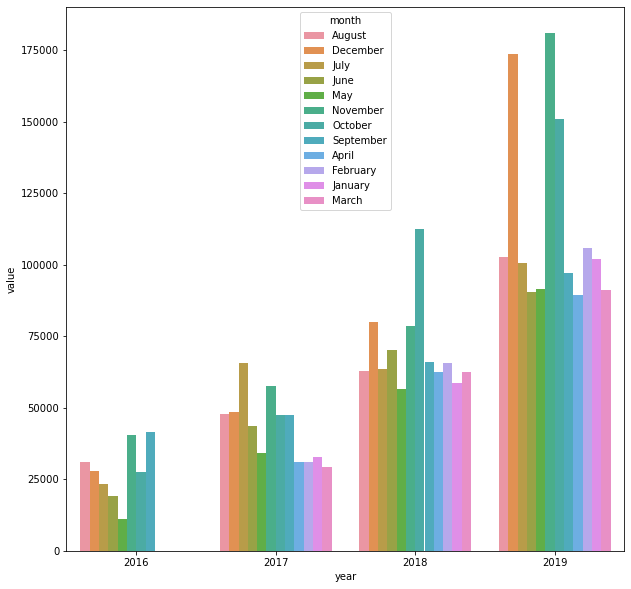

In [44]:
draw_bar_plot()

In [91]:
def draw_box_plot():
    # Prepare the data
    df_box = df.copy(deep = True)
    df_box = df_box.reset_index()
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,20))
    
    sns.boxplot(ax=ax1, data=df_box, x="year", y="value")
    sns.boxplot(ax=ax2, data=df_box, x="month", y="value")
    
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")
    
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")
    
#     bplot1 = ax1.boxplot(data=df_box, x="year", y="value")
#     ax1.set_title("Year-wise Box Plot(Trend)")
#     ax1.set_xlabel("Year")
#     ax1.set_ylabel("Page Views")
    
#     bplot2 = ax2.boxplot(data = df_box, x="month", y="value")
#     ax2.set_title("Month-wise Box Plot(Seasonality)")
#     ax2.set_xlabel("Month")
#     ax2.set_ylabel("Page Views")
    
    # plt.show()

None


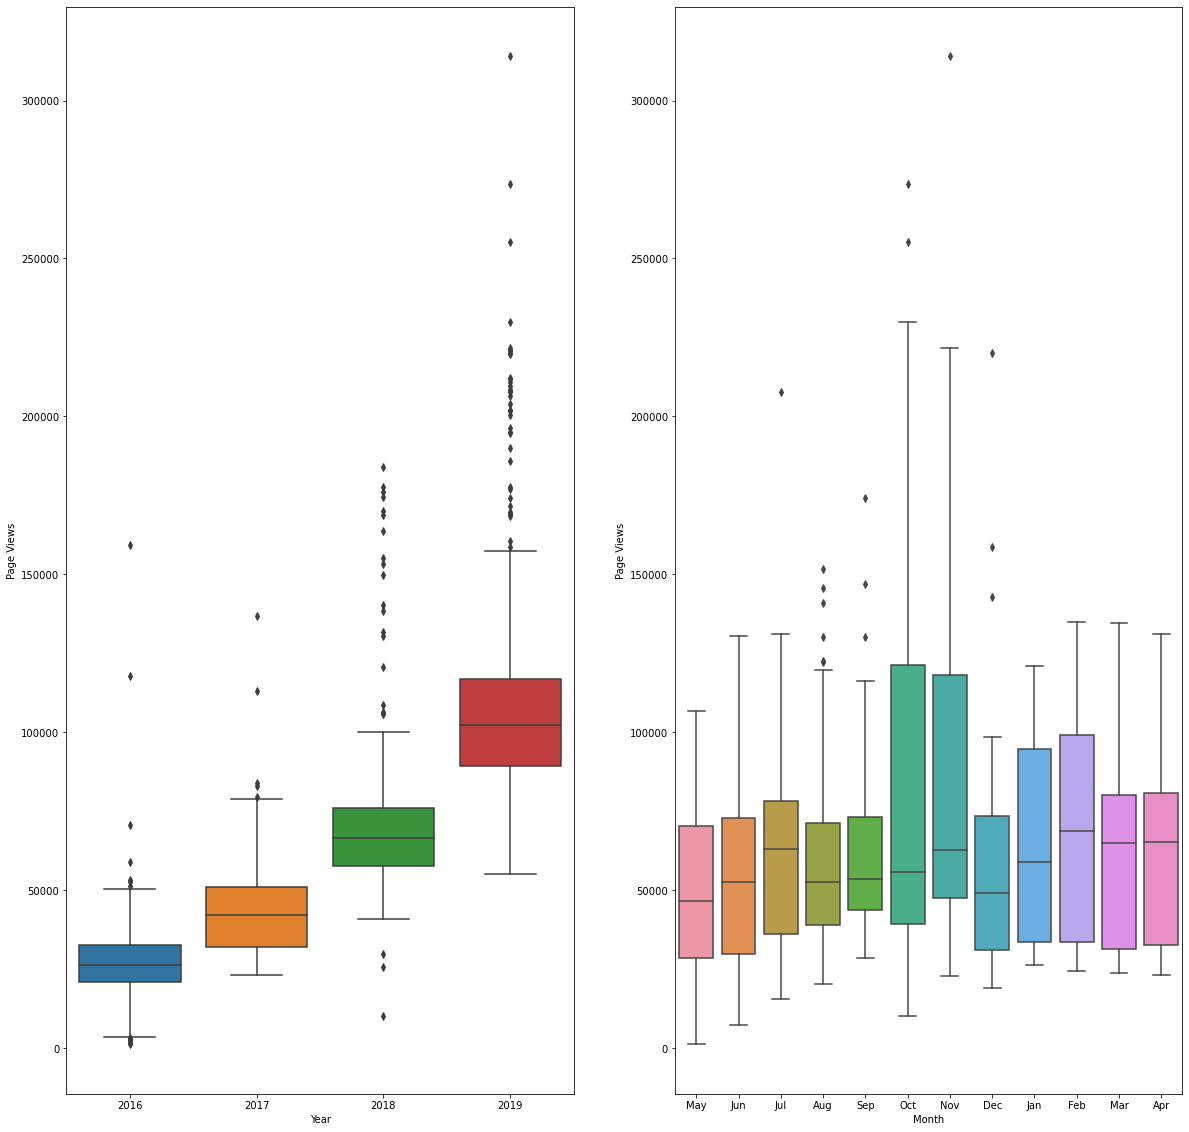

In [92]:
print(draw_box_plot())